In [2]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
import copy

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [3]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

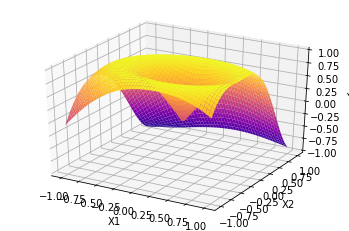

In [4]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [7]:
optimizer = tnn.Adam(0.01)
net = tnn.AutoForm(new_layers=True)
la1 = tnn.NonLinearLayer(2, 5, activation=tnn.Relu(), optimizer=optimizer)
la2 = tnn.NonLinearLayer(5, 5, activation=tnn.Relu(), optimizer=optimizer)
la3 = tnn.LinearLayer(5, 1, optimizer=optimizer)

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.MseLoss().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.4391607753897294


100 Error =  0.03581157491387491


200 Error =  0.011606432523000603


300 Error =  0.00950181240610086


400 Error =  0.008413664531165198


500 Error =  0.006897972051900348


600 Error =  0.0054472320840061594


700 Error =  0.004967008264975516


800 Error =  0.004437383327871811


900 Error =  0.004141195004014843


1000 Error =  0.003968993433210052


1100 Error =  0.003884033653320553


1200 Error =  0.0038157225005057555


1300 Error =  0.003797712264970197


1400 Error =  0.0037409446655731174


1500 Error =  0.003729436763843584


1600 Error =  0.0037002791078831164


1700 Error =  0.003688429070280725


1800 Error =  0.003684260977411074


1900 Error =  0.00367792622500928


2000 Error =  0.003676533200805518


2100 Error =  0.0036855375603670167


2200 Error =  0.0036772793837225614


2300 Error =  0.0036763306351634555


2400 Error =  0.0037158437654019622


2500 Error =  0.0036738368739113185


2600 Error =  0.0036712434904573764


2700 Err

TclError: invalid command name "."

### Computing the significance of each neuron

In [9]:
def compute_norm_of_neurons(in_layer, out_layer, order=2):
    innorm = np.linalg.norm(in_layer.weights, ord=order, axis=0)
    outnorm = np.linalg.norm(out_layer.weights, ord=order, axis=1)
    return innorm*outnorm

In [17]:
## layer1
compute_norm_of_neurons(la1, la2)

array([1.14182778, 2.99632837, 1.356224  , 3.27044542, 5.9404506 ])

In [18]:
## layer2
compute_norm_of_neurons(la2, la3)

array([2.48828595, 1.19874342, 0.89347184, 0.11094428, 1.57581187])

1.5911594231253656


/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


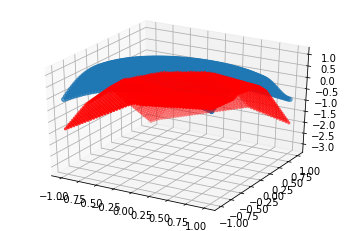

In [13]:
## Remove the least significant neuron and measure error
la3.weights[3, :] *= 0.
yout = net.forward(xx)
error = tnn.CrossEntropyBinary().loss(yout, yy)
print(error)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
fig.show()

In [14]:
## Retraining the network, removing the least significant neuron

In [16]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
#     la3.weights[3, :] *= 0.
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.MseLoss().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.0017901635184938358


100 Error =  0.001736939811512903


200 Error =  0.0016945178364211877


300 Error =  0.0016564059853529194


400 Error =  0.0016227731021280088


500 Error =  0.0015940458768461513


600 Error =  0.0015726022351562835


700 Error =  0.0015551479808207833


800 Error =  0.0015435450884521045


900 Error =  0.0015345604080074116


1000 Error =  0.001528093021103555


1100 Error =  0.0015215379181706206


1200 Error =  0.0015149400890474138


1300 Error =  0.0015077862567725612


1400 Error =  0.001503085411841331


1500 Error =  0.0014992410029858452


1600 Error =  0.0014957683882869505


1700 Error =  0.001491985440721962


1800 Error =  0.001486731589853997


1900 Error =  0.0014826675120771507


2000 Error =  0.0014781411231577382


TclError: invalid command name "."